<a href="https://colab.research.google.com/github/chl-eo/CCADMACL_EXERCISES_COM222/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd

In [71]:
df = pd.read_csv('netflix.csv')

In [72]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [73]:
df_nfdrop = df.drop(columns=['show_id', 'title', 'description', 'date_added', 'director', 'cast'])


In [74]:
s = (df_nfdrop.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['type', 'country', 'rating', 'duration', 'listed_in']


In [75]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    df_nfdrop[i]=df_nfdrop[[i]].apply(LE.fit_transform)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_nfdrop)
scaled_df = pd.DataFrame(scaler.transform(df_nfdrop),columns= df_nfdrop.columns )


1.   Apply dimensionality reduction using Principal Component









• Use the necessary number of principal components

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features for PCA
features = ['release_year', 'duration']
df['duration'] = df['duration'].apply(lambda x: int(str(x).split()[0]) if 'min' in str(x) else int(str(x).split()[0]) * 60)
X = df[features]  # Create a DataFrame with the selected features

# Standardize the features
X = StandardScaler().fit_transform(X)

# Apply PCA with n_components less than or equal to the number of features
pca = PCA(n_components=2)  # Changed n_components to 2
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])  # Updated column names
principalDf.head()

,principal component 1,principal component 2
0,-1.186211,2.166089
1,0.270468,0.063416
2,0.048322,-0.521929
3,-0.137389,-0.659214
4,-0.738724,-0.219378


2. Create a scree plot for each principal component

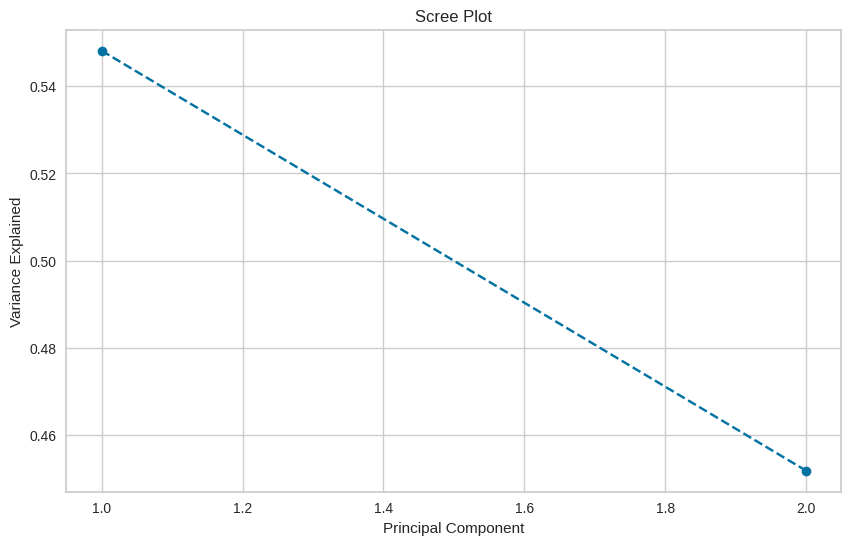

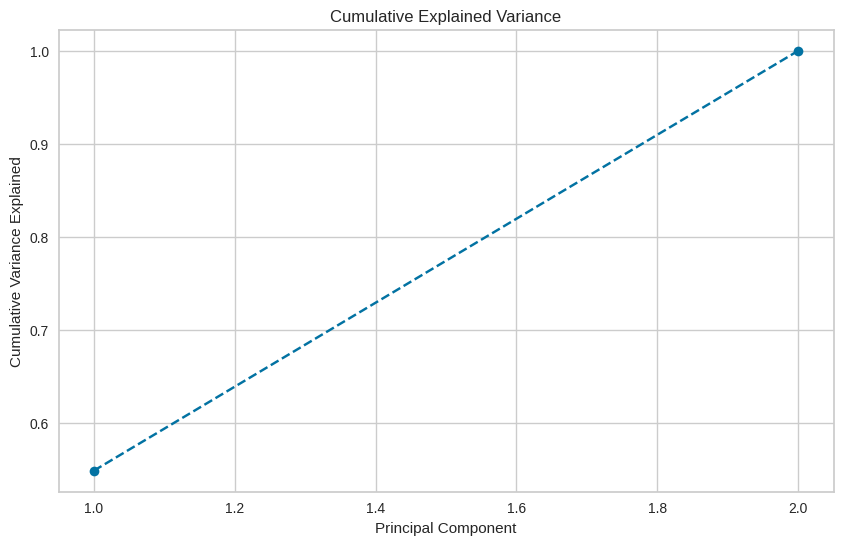

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()

3. Use any Clustering algorithm to create clusters




Elbow Method to determine the number of clusters to be formed:


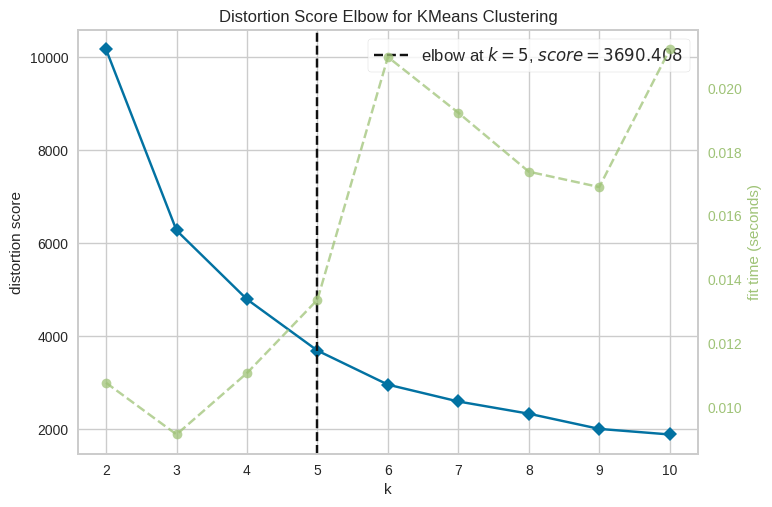

In [79]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D

#ELBOW
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(principalDf)
Elbow_M.show()

#optimal number of clusters from elbow
n_clusters = Elbow_M.elbow_value_

#Apply KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)

#Add the cluster as a column to DF
principalDf["Clusters"] = kmeans.labels_

4. Profile each cluster that you have generated based on your experiments


<ipython-input-88-b865ebbf65a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=principalDf["Clusters"], palette= pal)


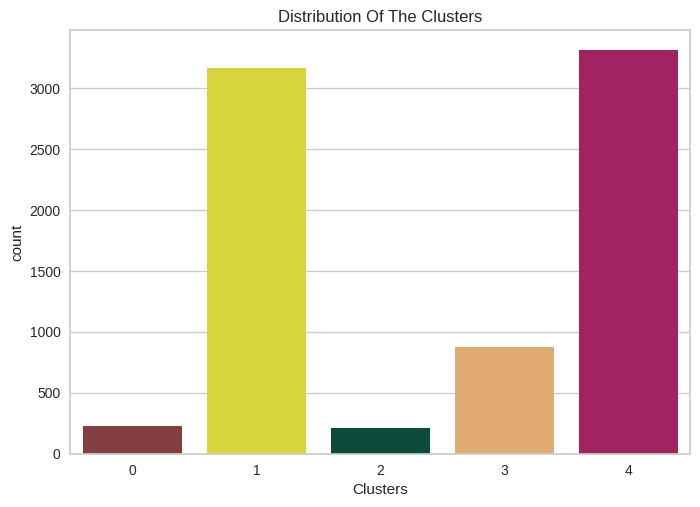

In [88]:
import seaborn as sns

#Plotting countplot of clusters
pal = ["#8F3535","#f1ee22", "#035541","#F3AB60", "#b60e62"]
pl = sns.countplot(x=principalDf["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

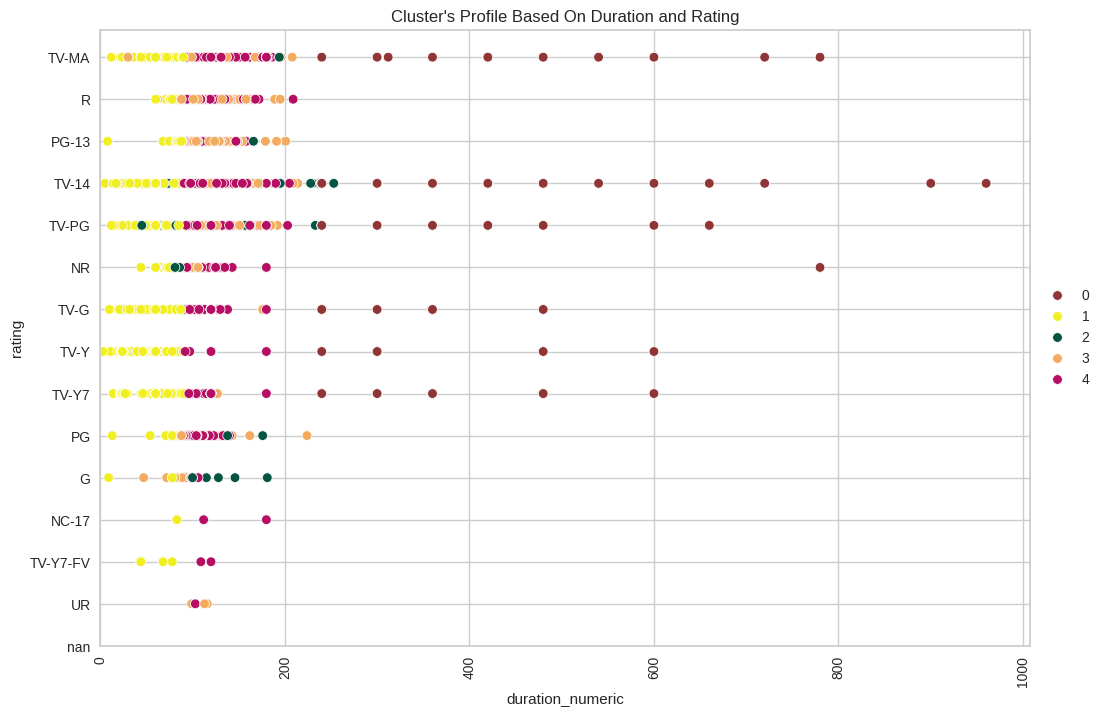

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df['duration'] = df['duration'].astype(str)

# Extract numerical duration (1 Season -> 1, 90 min -> 90)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# rating to string type before finding unique values
unique_ratings = np.unique(df['rating'].astype(str))

# Scatterplot with numerical duration
plt.figure(figsize=(12, 8))
sns.scatterplot(data=principalDf, x=df["duration_numeric"], y=df["rating"], hue="Clusters", palette=pal) # Changed PCA_ds to principalDf

plt.title("Cluster's Profile Based On Duration and Rating")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=90)

# y axis unique categorical rating values
plt.yticks(unique_ratings)

plt.xlim(left=0)

plt.show()